# Project structre notes
- `other-stateful` - older implementation of q-learning with states
- `rl` - helper functions from https://github.com/wangjksjtu/rl-perturbed-reward

# Intro

This notebook runs through the main classes.

Based on:
- Adapting Virtual Embodiment Through Reinforcement Learning (Prossute et al.)
- Reinforcement Learning with Perturbed Rewards (Wang et al.)

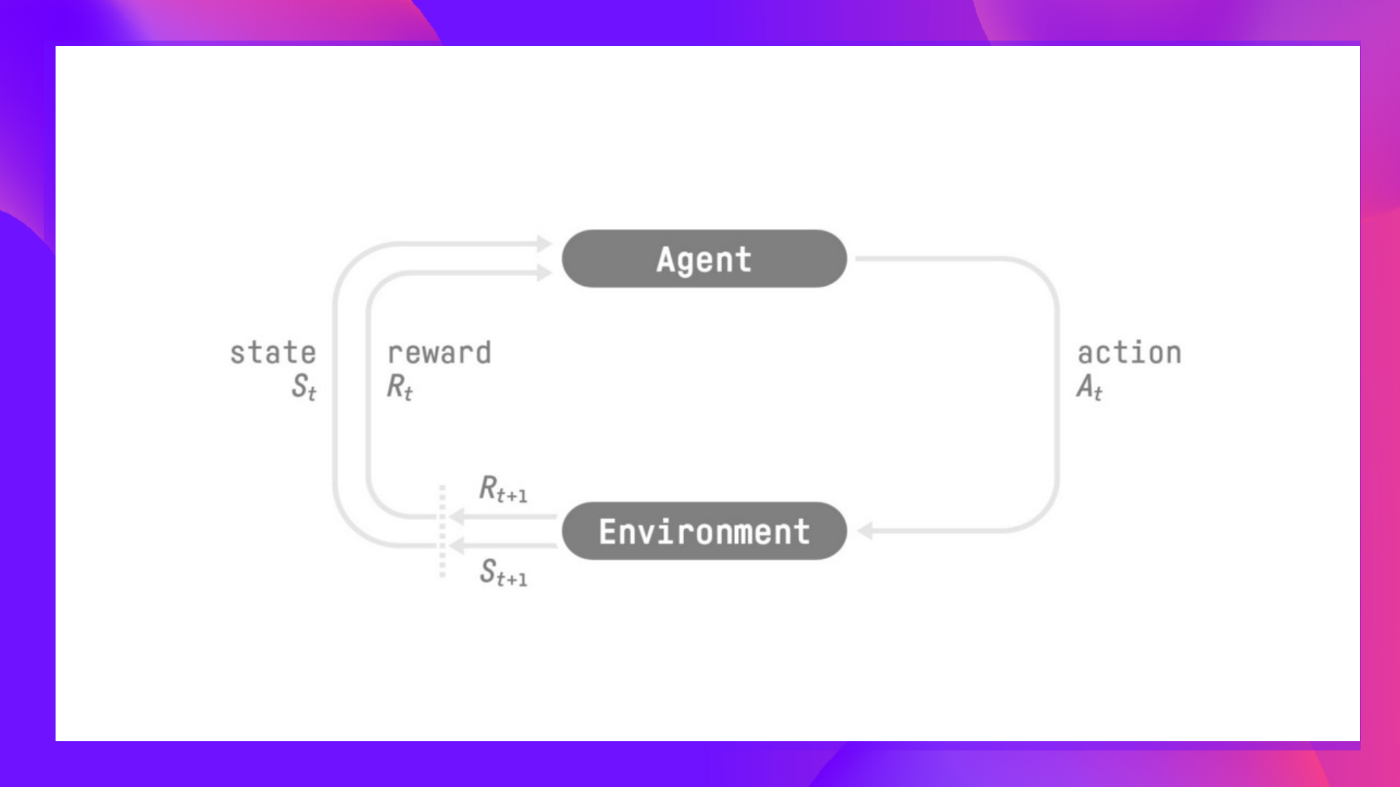

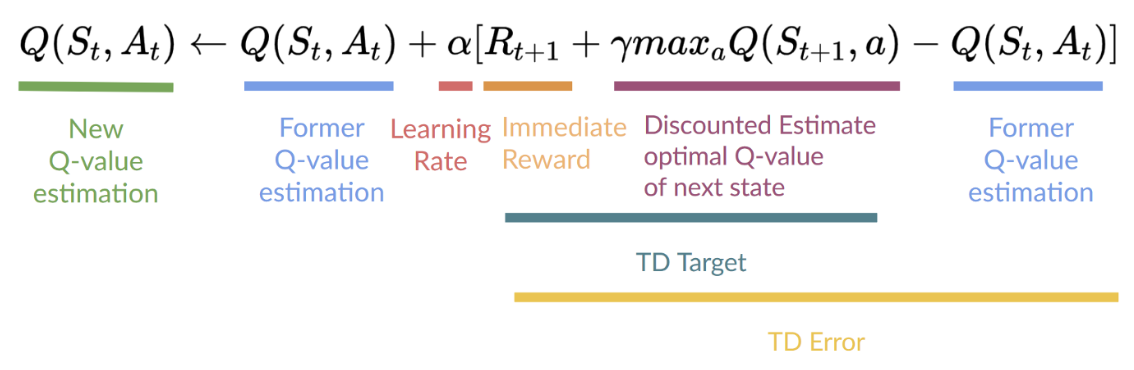

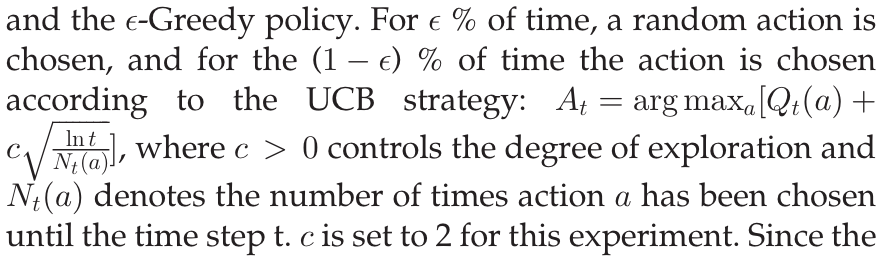

# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import noise_estimator

The initial agent and environment implementation had multiple states. We then decided on a stateless setting. At that point, it was easier to create a new `_stateless` wrapper class, which inherits from the multi classes, but sets `num_states=1`

In [3]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [4]:
import matplotlib.pyplot as plt

import utils
from utils import *
from modified_pendulum_processor import ModifiedPendulumProcessor

# Params

In [5]:
params_new = {
    'plots': True,
    }

params = default_params() | params_new

# Noiseless rewards UCB Q-learning

Q-table:
[[-6.3285 -5.5781 -6.145  -7.1198 -8.2346 -7.6182 -8.3717]]
Number of times action was taken:
[[ 9. 69. 11.  4.  5.  4.  3.]]
Total timesteps:
99


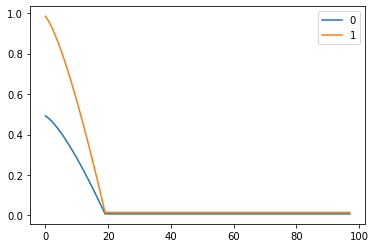

In [6]:
params_new = {
    'noise': False,
    }
params = params | params_new

agent = UCBQAgent(params=params)

q_values_for_chart, rewards, episode_length, selected_action, reward_processor, alphas, epsilons = runner(agent=agent, params=params)
utils.print_agent_stats(agent)
pd.DataFrame([alphas, epsilons]).T.plot()

100%|██████████| 100/100 [00:00<00:00, 616.85it/s]


Accuracy: 100.0
Mean episode length: 83.64


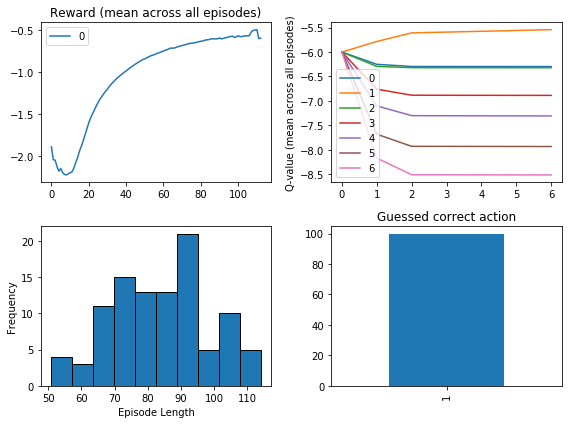

array([-6.296936, -5.541768, -6.320494, -6.887085, -7.307313, -7.93367 ,
       -8.515211])

In [7]:
params_new = {
    'noise': False,
    }
params = params | params_new

plot_mean_q_values(params=params)

100%|██████████| 1/1 [00:00<00:00, 402.56it/s]


Accuracy: 100.0
Mean episode length: 100.0


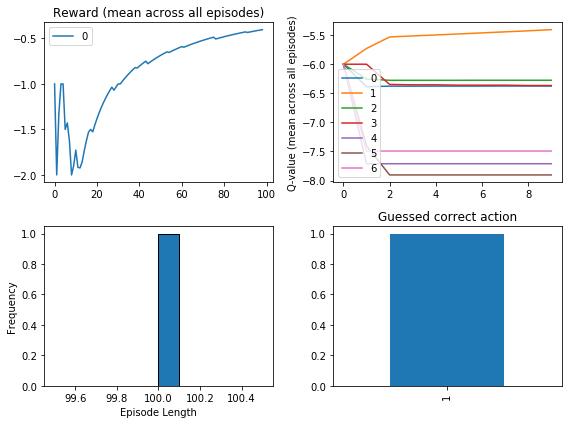

array([-6.3747, -5.4059, -6.2757, -6.3661, -7.7109, -7.9035, -7.4927])

In [8]:
params_new = {
    'noise': False,
    'max_steps': 100,
    'num_episodes': 1,
    # 'convergence_count_start': 10000,    
    }
params = default_params() | params_new

plot_mean_q_values(params=params)

# Noisy rewards
- rewards are now noisy
- q-learner hasn't changed

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

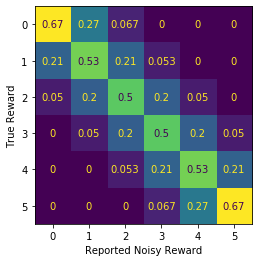

Is invertible: 


True

In [12]:
params = default_params()
num_actions = params['num_actions']
correct_action = params['correct_action']
# params['diag'] = 0.69
# Confusion matrix used as noise
env = ModifiedRandomEnvironment(params=params)
num_unique_rewards = env.get_num_unique_rewards()
cmat = ModifiedPendulumProcessor(num_unique_rewards=num_unique_rewards).initialize_cmat()
disp = ConfusionMatrixDisplay(cmat)
ax = disp.plot(colorbar=False).ax_
ax.set_ylabel('True Reward')
ax.set_xlabel('Reported Noisy Reward') 
plt.show()
print('Is invertible: ')
noise_estimator.is_invertible(cmat)

100%|██████████| 100/100 [00:00<00:00, 347.17it/s]


Accuracy: 93.0
Mean episode length: 117.67
Last reward processor:
Estimated confusion matrix:


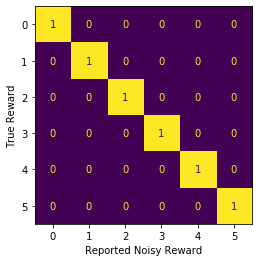

Reward sets:
(0, 0): [-1, 0, 0, -1, -2, -1, -2, -1, -1, -2, -1, 0, 0, 0, -2, -1, -1, 0, 0, -3, -2, -2, -2, -1, -2, -1, -2]
(0, 1): [0, -1, -1, 0, -1, -2, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, -1, 0, -2, 0, -2, 0, -2, 0, -1]
(0, 2): [-2, -1, -1, -1, -2, -2, -1, -1, 0, -1, -1, -3, -1, 0]
(0, 3): [-3, -1, -2, 0]
(0, 4): [-2, -1, -3, -3, -4, -4, -3]
(0, 5): [-5, -2, -4]
(0, 6): [-5, -5, -4, -5, -5]
Reward set counts:
Key (0, 0): 27 items
Key (0, 1): 59 items
Key (0, 2): 14 items
Key (0, 3): 4 items
Key (0, 4): 7 items
Key (0, 5): 3 items
Key (0, 6): 5 items


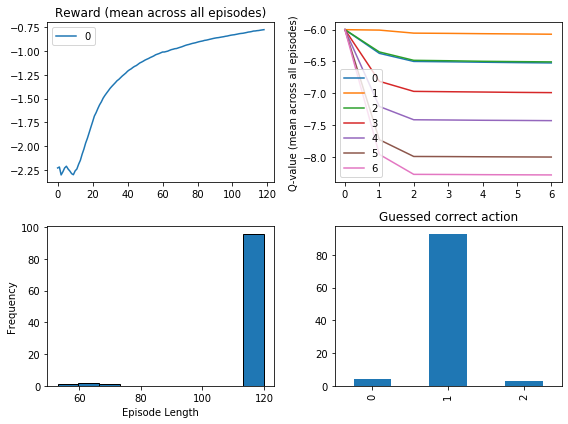

array([-6.522646, -6.071503, -6.506356, -6.98935 , -7.429492, -8.001566,
       -8.28265 ])

In [13]:
# res = {'target': 95.89999999999999, 'params': {'alpha': 0.8236118040381998, 'alpha_decay': 243.0544785033269, 'alpha_min': 0.5113965695937486, 'epsilon': 0.25289603267158034, 'epsilon_decay': 70.53090930872196, 'epsilon_min': 0.044310479986752194, 'gamma': 0.8871072251030447, 'surrogate_c_interval': 67.76179038423699}}
# params=res['params']
params_new = {
    'noise': True,
    'plots': True,
    }
params = default_params() | params_new
plot_mean_q_values(params=params)

# Surrogate rewards

100%|██████████| 1/1 [00:00<00:00, 18.61it/s]

Accuracy: 100.0
Mean episode length: 1200.0
Last reward processor:
Estimated confusion matrix:


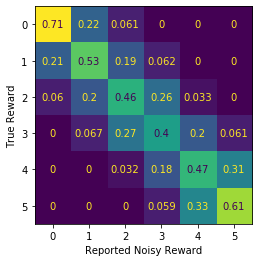

Reward sets:
(0, 0): [-1, -1, -1, -1, -2, -1, -2, -1, -2, -2, -1, -2, 0, -1, -1, 0, -3, 0, -1, -1, -2, 0, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -2, 0, -1, -1, -1, -1, 0, -1, -1, -2, -1, -1, -2, -1, -1, -2, 0, -1, -1, -2, -1, -1, -1, -1, 0, -1, -1, -1, 0, 0, -2, -1, 0, 0, -1, -2, -1, -1, -2, -2, -1, 0, 0, 0, 0, -2, -1, -1, -1, -2, -1, 0]
(0, 1): [0, 0, 0, 0, 0, -1, 0, -2, 0, 0, 0, 0, -2, 0, -1, -1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, -1, -2, -1, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, -2, -1, 0, 0, -2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, -2, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, -2, 0, -1, -1, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -2, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, -2, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, -2, -2, 0, 0, 0, 0, 0, 0, 0, -2, -1, -2, 0, 0, 0

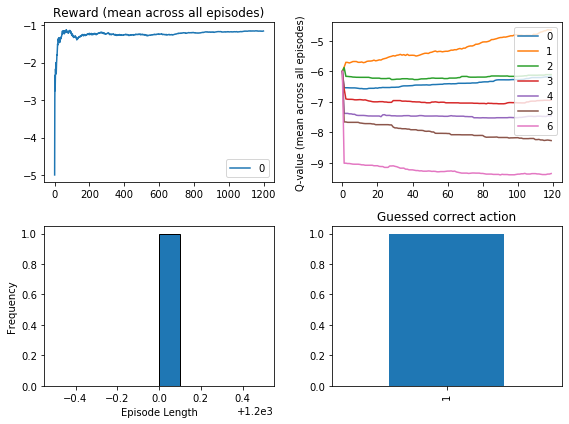

array([-6.1633, -4.6365, -6.1038, -6.9389, -7.4554, -8.2695, -9.3517])

In [14]:
# When we always pick at random, we never end up consistently picking the same action
# so the episode end is never triggered by. 
# Therefore the agent has enough observations to properly estimate the noise matrix
params_new ={
    'max_steps': 1200,
    'num_episodes': 1,
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # epsilon min must be high, otherwise we never end up with a convertable matrix
    # and never end up using the surrogate rewards
    'epsilon_min': 0.5,
    # 'diag': 0.5,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 262.36it/s]


Accuracy: 93.0
Mean episode length: 100.23
Last reward processor:
Estimated confusion matrix:


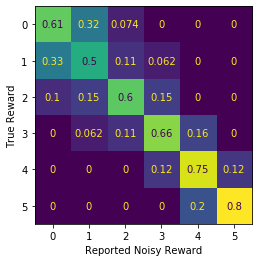

Reward sets:
(0, 0): [-1, 0, -1, -3, -1, 0, 0, -1]
(0, 1): [0, 0, 0, -1, -2, -2, -2, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, -2, 0, 0]
(0, 2): [-2, -1, -2, -1]
(0, 3): [0, -1, -2, -3, -3, -2, -2, -3, -2]
(0, 4): [-3, -3, -4]
(0, 5): [-4]
(0, 6): [-4, -5, -5]
Reward set counts:
Key (0, 0): 8 items
Key (0, 1): 52 items
Key (0, 2): 4 items
Key (0, 3): 9 items
Key (0, 4): 3 items
Key (0, 5): 1 items
Key (0, 6): 3 items


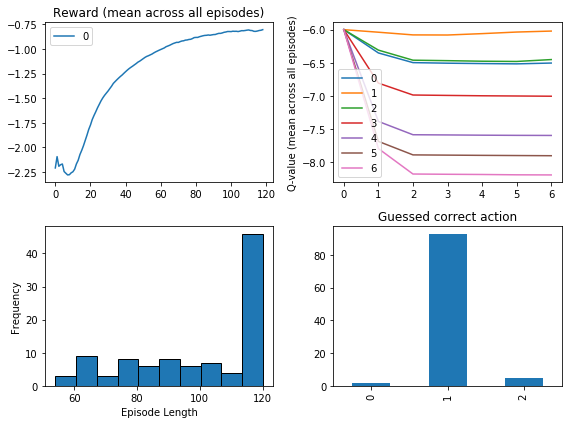

array([-6.502995, -6.02128 , -6.450618, -7.002832, -7.593789, -7.899308,
       -8.188851])

In [15]:
params_new ={
    'surrogate': True,
    'plots': True,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

#TODO: Accuracy seems to be back to good, compare with disabling normalization

# Sanity check

In [16]:
params = default_params()

print('Accuracy should be higher, timesteps should be lower')

params['noise'] = False
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

Accuracy should be higher, timesteps should be lower


100%|██████████| 100/100 [00:00<00:00, 646.91it/s]


100.0 83.49


100%|██████████| 100/100 [00:00<00:00, 366.67it/s]


99.0 118.44


100%|██████████| 100/100 [00:00<00:00, 289.20it/s]

96.0 98.98
